# Run qiskit circuits in DQPU

In [1]:
from qiskit import QuantumCircuit, transpile
from dqpu.backends.qiskit import DQPUBackend

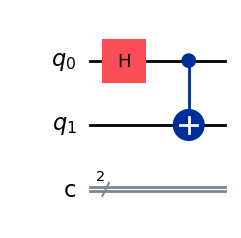

In [2]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

In [3]:
backend = DQPUBackend()
backend.load_account("dqpu_alice.testnet")

/home/dakk/.pyenv/versions/3.10.13/envs/dqpu-env/lib/python3.10/site-packages/dqpu-0.2.1-py3.10.egg/dqpu/blockchain/near.py:62: RuntimeWarning: coroutine 'NearBlockchain.load_account.<locals>.v' was never awaited
  return loop.run_until_complete(v())


In [4]:
circ = transpile(qc, backend)
job = backend.run(circ, shots=1024)

In [5]:
print(job.status())

JobStatus.RUNNING


In [6]:
counts = job.result().get_counts(circ)

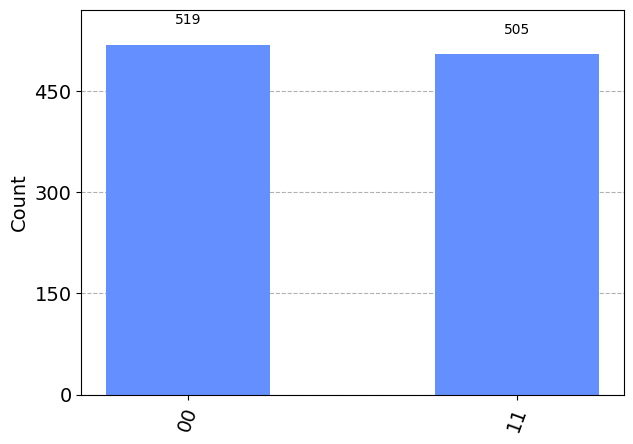

In [7]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)